In [4]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from datetime import datetime

In [5]:
def get_sp500_companies():
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    html = requests.get(url).text
    df = pd.read_html(html)[0]
    return df

In [6]:
sp500_companies = get_sp500_companies()
companies = dict(zip(sp500_companies['Security'], sp500_companies['Symbol']))


C:\Users\indra\AppData\Local\Temp\ipykernel_32568\2176904211.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html)[0]


In [7]:
stock_name = 'Alphabet Inc. (Class A)'  # Example; replace with dynamic selection in your UI
stock = companies[stock_name]

In [8]:
start = '2012-01-01'
end = '2024-07-23'

In [9]:
data = yf.download(stock, start, end)
data = data[::-1]

[*********************100%%**********************]  1 of 1 completed


In [10]:
data.reset_index(inplace=True)

In [11]:
ma_100_days = data.Close.rolling(100).mean()

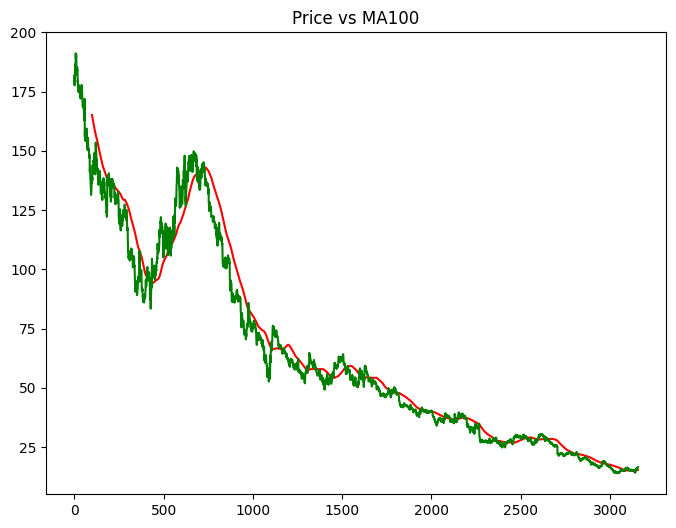

In [12]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.title('Price vs MA100')
plt.show()

In [13]:
ma_200_days = data.Close.rolling(200).mean()

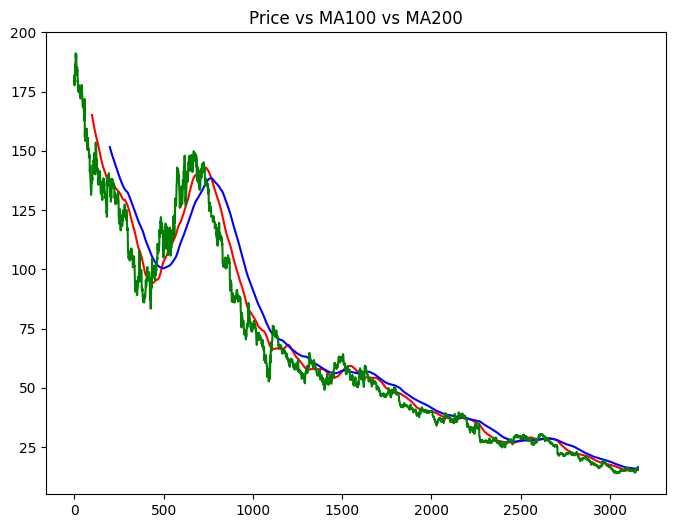

In [14]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.title('Price vs MA100 vs MA200')
plt.show()

In [15]:
data.dropna(inplace=True)

C:\Users\indra\AppData\Local\Temp\ipykernel_32568\1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [16]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
data_train_scale = scaler.fit_transform(data_train)

In [18]:
x_train = []
y_train = []

for i in range(100, data_train_scale.shape[0]):
    x_train.append(data_train_scale[i-100:i])
    y_train.append(data_train_scale[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units =1))

c:\Users\indra\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
model.fit(x_train, y_train, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - loss: 0.0436
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - loss: 0.0047
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 0.0050
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - loss: 0.0033
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - loss: 0.0039
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - loss: 0.0037
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 0.0027
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - loss: 0.0032
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - loss: 0.0028
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 151ms/step - loss: 0.0030
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 164ms/step - loss: 0.0031
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step - loss: 0.0027
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step - loss: 0.0027
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 187ms/step - loss: 0.0025
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 172m

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [23]:
pas_100_days = data_train.tail(100)
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)
data_test_scale = scaler.transform(data_test)

In [24]:
x_test = []
y_test = []

for i in range(100, data_test_scale.shape[0]):
    x_test.append(data_test_scale[i-100:i])
    y_test.append(data_test_scale[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [25]:
y_predict = model.predict(x_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step


In [26]:
scale = 1/scaler.scale_
y_predict = y_predict * scale
y_test = y_test * scale

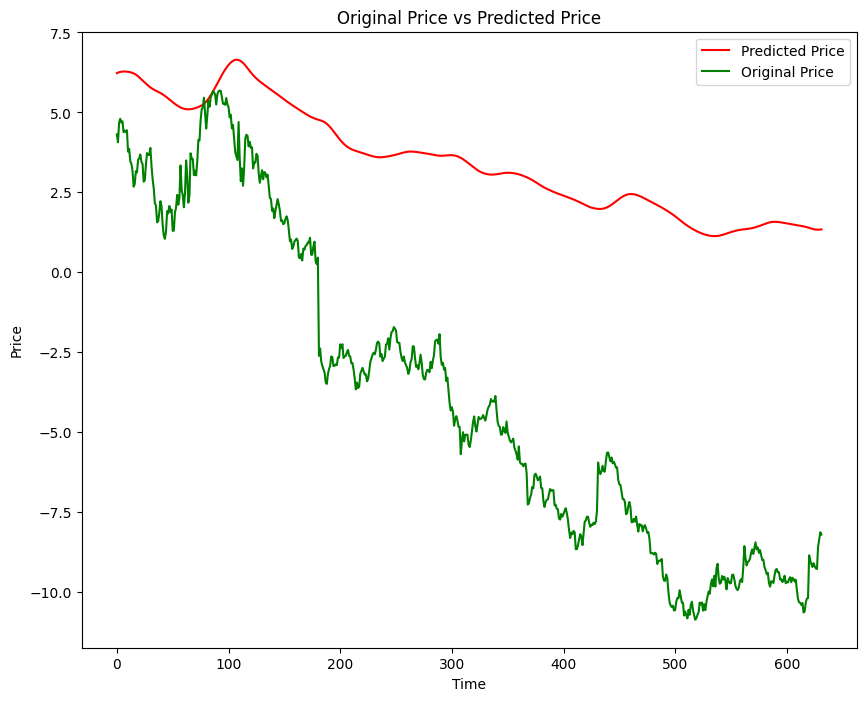

In [27]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y_test, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('Original Price vs Predicted Price')
plt.show()

In [28]:
model.save('Stock Predictions Model.keras')